In [2]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab 
import pingouin as pg
from scipy.stats import mannwhitneyu
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
IDEOTYPES = {'T' : 'Blue',
             'dT' : 'Red', 'DT' : 'Red',
             'C' : 'Green', 'CT' : 'Green',
             'B' : 'Yellow'}
CONDITIONS = {'S' : 'Yellow', 'C': 'Blue'}

In [4]:
best_of_best_df = pd.read_csv('%s/best_of_best.csv' % RESULTS_DIR, skipinitialspace=True)
best_of_best_df

,arbor name,optimal G,optimal alpha,optimal pt distance
0,001_1_C_day2,0.0,0.34,0.039285
1,001_1_C_day3,-0.2,0.56,0.467474
2,001_1_C_day4,-0.1,0.69,4.021863
3,001_1_C_day5,-0.1,0.71,27.309913
4,001_1_S_day2,0.3,0.35,0.007441
...,...,...,...,...
2050,M248_8_S_locyto_day9,0.2,0.60,0.053109
2051,m248_9_C_1acc_day9,0.1,0.80,12.011595
2052,M248_9_C_noga_day9,0.0,0.60,13.855354
2053,M248_9_S_10aba_day9,-0.2,0.30,0.908609


In [5]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)
ideotypes_df.dropna(subset=['ideotype'], inplace=True)

In [6]:
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,PimpiBig4,233,1,Blue,C,L,NaN,LR up,Green
1,PimpiBig4,281,1,Blue,T,M,NaN,NaN,Blue
2,PimpiBig4,287,1,Blue,T,M,NaN,NaN,Blue
3,PimpiBig4,246,2,Yellow,C,L,IR,NaN,Green
4,PimpiBig4,263,3,Blue,dT,L,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,Blue,dT,M,NaN,NaN,Red
1444,PimpiBig1,144,308,Blue,C,M,NaN,NaN,Green
1445,PimpiBig1,87,308,Yellow,C,S,Y,NaN,Green
1446,PimpiBig1,131,308,Yellow,C,M,D,NaN,Green


In [7]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df['genotype'].unique()

array(['M248', 'M058', 'LA1511', 'LA511', 'la1511', 'm248', 'm058', '288',
       '189', '214', '201', '306', '213', '207', '199', '212', '286',
       '220', '294', '287', '293', '195', '277', '300', '292', '283',
       '298', '291', '280', '284', '197', '290', '196', '308', '200',
       '211', '285', '301', '279', '194', '235', '278', '198', '282',
       '289', '307', '299', '192', '171', '147', '252', '258', '166',
       '269', '270', '064', '253', '264', '193', '146', '140', '141',
       '267', '256', '260', '061', '062', '065', '251', '138', '272',
       '168', '139', '169', '083', '144', '165', '255', '172', '170',
       '268', '262', '261', '142', '167', '259', '191', '060', '066',
       '136', '143', '082', '063', '230', '234', '173', '084', '240',
       '236', '241', '231', '176', '228', '244', '237', '174', '274',
       '249', '247', '091', '227', '250', '093', '229', '271', '239',
       '221', '233', '225', '245', '038', '273', '248', '089', '085',
       '175', '

In [8]:
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiABA,M248_10_C_10aba_day5,5,1,M248,10,Blue,10aba
1,PimpiABA,M248_9_C_10aba_day5,5,2,M248,9,Blue,10aba
2,PimpiABA,M248_8_C_10aba_day5,5,3,M248,8,Blue,10aba
3,PimpiABA,M248_7_C_10aba_day5,5,4,M248,7,Blue,10aba
4,PimpiABA,M248_6_C_10aba_day5,5,5,M248,6,Blue,10aba
...,...,...,...,...,...,...,...,...
9790,PimpiIAA1,1511_2_C_noiaa_day9,9,148,1511,2,Blue,noiaa
9791,PimpiIAA1,1511_3_C_noiaa_day9,9,149,1511,3,Blue,noiaa
9792,PimpiIAA1,1511_4_C_noiaa_day9,9,150,1511,4,Blue,noiaa
9793,PimpiIAA1,1511_5_C_noiaa_day9,9,151,1511,5,Blue,noiaa


In [9]:
arbor_stats_df = pd.merge(best_of_best_df, metadata_df, on = 'arbor name')

In [10]:
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,001,1,Blue,NaN
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,001,1,Blue,NaN
2,001_1_C_day4,-0.1,0.69,4.021863,PimpiBig4,4,235,001,1,Blue,NaN
3,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,001,1,Blue,NaN
4,001_1_S_day2,0.3,0.35,0.007441,PimpiBig4,2,30,001,1,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2109,m248_9_C_1acc_day9,0.1,0.80,12.011595,PimpiACC,9,150,m248,9,Blue,1acc
2110,M248_9_C_noga_day9,0.0,0.60,13.855354,PimpiGA,9,9,M248,9,Blue,noga
2111,M248_9_S_10aba_day9,-0.2,0.30,0.908609,PimpiABA,9,22,M248,9,Yellow,10aba
2112,M248_9_S_10aba_day9,-0.2,0.30,0.908609,PimpiABA,9,29,M248,9,Yellow,10aba


In [11]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str).str.lstrip('0')
arbor_stats_df = arbor_stats_df.dropna(subset = ['condition'])

In [12]:
arbor_stats_df.isnull().sum()

arbor name                0
optimal G                 0
optimal alpha             0
optimal pt distance       0
experiment                0
day                       0
Picture #                 0
genotype                  0
replicate                 0
condition                 0
hormone                1929
dtype: int64

In [13]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype             int64
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [14]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(object)

In [15]:
ideotypes_df = ideotypes_df.dropna(subset = ['condition'])

In [16]:
ideotypes_df.isnull().sum()

experiment             0
Picture #              0
genotype               0
condition              0
ideotype (T/C/B)       0
size (L/M/S)           2
Sodium gap?          728
comments extra      1299
ideotype               0
dtype: int64

In [17]:
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,PimpiBig4,233,1,Blue,C,L,NaN,LR up,Green
1,PimpiBig4,281,1,Blue,T,M,NaN,NaN,Blue
2,PimpiBig4,287,1,Blue,T,M,NaN,NaN,Blue
3,PimpiBig4,246,2,Yellow,C,L,IR,NaN,Green
4,PimpiBig4,263,3,Blue,dT,L,NaN,NaN,Red
...,...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,Blue,dT,M,NaN,NaN,Red
1444,PimpiBig1,144,308,Blue,C,M,NaN,NaN,Green
1445,PimpiBig1,87,308,Yellow,C,S,Y,NaN,Green
1446,PimpiBig1,131,308,Yellow,C,M,D,NaN,Green


In [18]:
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,1,1,Blue,NaN
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,1,1,Blue,NaN
2,001_1_C_day4,-0.1,0.69,4.021863,PimpiBig4,4,235,1,1,Blue,NaN
3,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,1,1,Blue,NaN
4,001_1_S_day2,0.3,0.35,0.007441,PimpiBig4,2,30,1,1,Yellow,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2109,m248_9_C_1acc_day9,0.1,0.80,12.011595,PimpiACC,9,150,m248,9,Blue,1acc
2110,M248_9_C_noga_day9,0.0,0.60,13.855354,PimpiGA,9,9,M248,9,Blue,noga
2111,M248_9_S_10aba_day9,-0.2,0.30,0.908609,PimpiABA,9,22,M248,9,Yellow,10aba
2112,M248_9_S_10aba_day9,-0.2,0.30,0.908609,PimpiABA,9,29,M248,9,Yellow,10aba


In [19]:
common_values = set(arbor_stats_df[['experiment', 'genotype', 'condition', 'Picture #']].apply(tuple, axis=1)) & \
                set(ideotypes_df[['experiment', 'genotype', 'condition', 'Picture #']].apply(tuple, axis=1))
print(common_values)

set()


In [20]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)

C:\Users\agarz\AppData\Local\Temp\ipykernel_20536\326811934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
C:\Users\agarz\AppData\Local\Temp\ipykernel_20536\326811934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)


In [21]:
print(arbor_stats_df['genotype'].unique())

['1' '2' '3' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '17' '19'
 '20' '21' '22' '23' '24' '27' '28' '29' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '40' '42' '43' '44' '45' '46' '48' '49' '50' '52' '53'
 '54' '55' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67'
 '69' '70' '72' '73' '74' '75' '76' '78' '79' '80' '81' '82' '83' '84'
 '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98'
 '99' '101' '102' '103' '104' '105' '106' '136' '138' '139' '140' '141'
 '142' '143' '144' '146' '147' '1511' '165' '166' '167' '168' '169' '170'
 '171' '172' '173' '174' '175' '176' '179' '189' '191' '192' '193' '194'
 '195' '196' '197' '198' '199' '200' '201' '207' '211' '212' '213' '214'
 '220' '221' '222' '225' '227' '228' '229' '230' '231' '233' '234' '235'
 '236' '237' '239' '240' '241' '244' '245' '247' '248' '249' '250' '251'
 '252' '253' '255' '256' '258' '259' '260' '261' '262' '264' '267' '268'
 '269' '270' '271' '272' '273' '274' '277' '278' '279' '280' 

In [23]:
test = pd.merge(arbor_stats_df, ideotypes_df, on = ['experiment', 'genotype','condition', 'Picture #'])
test

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,001_1_C_day2,0.0,0.34,0.039285,PimpiBig4,2,233,1,1,Blue,NaN,C,L,NaN,LR up,Green
1,001_1_C_day3,-0.2,0.56,0.467474,PimpiBig4,3,233,1,1,Blue,NaN,C,L,NaN,LR up,Green
2,001_1_C_day5,-0.1,0.71,27.309913,PimpiBig4,5,233,1,1,Blue,NaN,C,L,NaN,LR up,Green
3,001_2_C_day2,-0.3,0.49,0.013003,PimpiBig4,2,287,1,2,Blue,NaN,T,M,NaN,NaN,Blue
4,001_2_C_day3,0.0,0.53,1.396555,PimpiBig4,3,287,1,2,Blue,NaN,T,M,NaN,NaN,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,308_1_S_day5,0.0,1.00,0.002773,PimpiBig1,5,87,308,1,Yellow,NaN,C,S,Y,NaN,Green
1253,308_2_C_day5,0.0,0.70,6.262286,PimpiBig1,5,144,308,2,Blue,NaN,C,M,NaN,NaN,Green
1254,308_2_S_day5,0.1,0.60,0.696750,PimpiBig1,5,131,308,2,Yellow,NaN,C,M,D,NaN,Green
1255,308_3_C_day5,-0.2,0.50,21.718800,PimpiBig1,5,95,308,3,Blue,NaN,dT,M,NaN,NaN,Red


In [24]:
print(arbor_stats_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())


experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [25]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


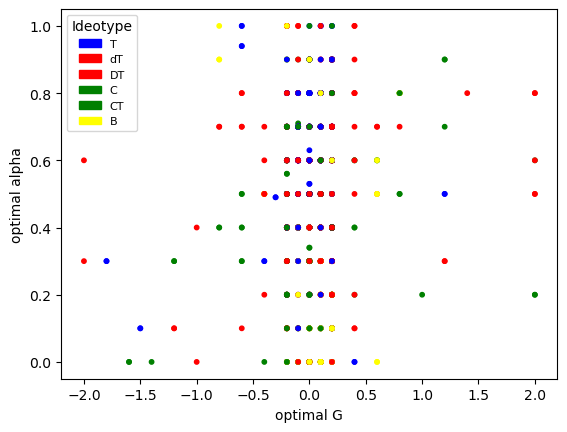

In [26]:
results = test.plot.scatter(x = 'optimal G', y = 'optimal alpha', c='ideotype', s = 10)

# Define the colors based on the IDEOTYPES dictionary
color_mapping = {v: k for k, v in IDEOTYPES.items()}

# Create a custom legend using patches for each color in IDEOTYPES
legend_labels = [mpatches.Patch(color=color, label=key) for key, color in IDEOTYPES.items()]

# Add the legend to the plot
plt.legend(handles=legend_labels, title="Ideotype", loc='best', fontsize=8, title_fontsize=10, markerscale=0.5)

# Display the plot
plt.show()

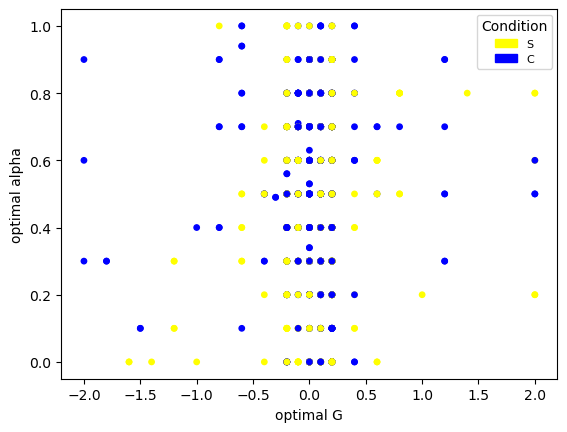

In [108]:
results = test.plot.scatter(x = 'optimal G', y = 'optimal alpha', c='condition', s = 15)
#Salt is Yellow, Control is Blue

# Define the colors based on the IDEOTYPES dictionary
color_mapping = {v: k for k, v in CONDITIONS.items()}

# Create a custom legend using patches for each color in IDEOTYPES
legend_labels = [mpatches.Patch(color=color, label=key) for key, color in CONDITIONS.items()]

# Add the legend to the plot
plt.legend(handles=legend_labels, title="Condition", loc='best', fontsize=8, title_fontsize=10, markerscale=0.5)

# Display the plot
plt.show()

In [89]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
281,012_3_S_day5,0.2,0.2,26.214647,PimpiBig4,5,306,012,3,Salt,NaN
102,005_4_C_day5,-0.0,0.7,15.879516,PimpiBig4,5,102,005,4,Control,NaN
264,012_1_S_day5,-0.8,1.0,575.416278,PimpiBig4,5,326,012,1,Salt,NaN
133,007_1_S_day5,-0.2,0.2,6.262724,PimpiBig4,5,4,007,1,Salt,NaN
268,012_2_C_day5,-0.0,0.2,33.199128,PimpiBig4,5,154,012,2,Control,NaN
...,...,...,...,...,...,...,...,...,...,...,...
310,013_3_C_day5,0.2,0.0,780.832119,PimpiBig4,5,275,013,3,Control,NaN
7,001_1_S_day5,-0.4,0.1,2.184169,PimpiBig4,5,30,001,1,Salt,NaN
63,002_4_S_day5,0.4,0.3,29.114588,PimpiBig4,5,82,002,4,Salt,NaN
347,015_3_S_day5,-0.0,0.3,18.621640,PimpiBig6,5,79,015,3,Salt,NaN


In [90]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str)

In [91]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype            object
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [92]:
last_day_arbors.dtypes

arbor name              object
optimal G              float64
optimal alpha          float64
optimal pt distance    float64
experiment              object
day                      int64
Picture #                int64
genotype                object
replicate                int64
condition               object
hormone                 object
dtype: object

In [93]:
last_day_arbors['genotype'].unique()

array(['012', '005', '007', '006', '013', '003', '011', '009', '010',
       '008', '014', '015', '002', '001'], dtype=object)

In [94]:
ideotypes_df['genotype'].unique()

array(['1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '19', '20', '21', '22', '23', '24', '27', '28', '29',
       '30', '31', '33', '34', '35', '36', '37', '38', '40', '42', '43',
       '44', '45', '46', '48', '49', '50', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '69', '70', '72', '73', '74', '75', '76', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '98', '99', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '111', '112', '113', '115',
       '116', '117', '118', '119', '120', '121', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '135', '136', '138',
       '139', '140', '141', '142', '143', '144', '146', '147', '149',
       '150', '151', '153', '154', '155', '156', '157', '158', '159',
       '160', '162', '165', '166', '167', '168', '169', '170', '171',

In [95]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     0
dtype: int64


In [96]:
print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].isnull().sum())

experiment    0
Picture #     0
genotype      0
condition     2
dtype: int64


In [97]:

ideotypes_df.dropna(subset=['experiment', 'Picture #', 'genotype', 'condition'], inplace=True)

In [98]:

print(ideotypes_df[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

  experiment  Picture # genotype condition
0  PimpiBig4        233        1   Control
1  PimpiBig4        281        1   Control
2  PimpiBig4        287        1   Control
3  PimpiBig4        246        2      Salt
4  PimpiBig4        263        3   Control


In [99]:
print(last_day_arbors[['experiment', 'Picture #', 'genotype', 'condition']].drop_duplicates().head())

    experiment  Picture # genotype condition
281  PimpiBig4        306      012      Salt
102  PimpiBig4        102      005   Control
264  PimpiBig4        326      012      Salt
133  PimpiBig4          4      007      Salt
268  PimpiBig4        154      012   Control


In [100]:
last_day_arbors
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str).str.lstrip('0')
last_day_arbors

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
281,012_3_S_day5,0.2,0.2,26.214647,PimpiBig4,5,306,12,3,Salt,NaN
102,005_4_C_day5,-0.0,0.7,15.879516,PimpiBig4,5,102,5,4,Control,NaN
264,012_1_S_day5,-0.8,1.0,575.416278,PimpiBig4,5,326,12,1,Salt,NaN
133,007_1_S_day5,-0.2,0.2,6.262724,PimpiBig4,5,4,7,1,Salt,NaN
268,012_2_C_day5,-0.0,0.2,33.199128,PimpiBig4,5,154,12,2,Control,NaN
...,...,...,...,...,...,...,...,...,...,...,...
310,013_3_C_day5,0.2,0.0,780.832119,PimpiBig4,5,275,13,3,Control,NaN
7,001_1_S_day5,-0.4,0.1,2.184169,PimpiBig4,5,30,1,1,Salt,NaN
63,002_4_S_day5,0.4,0.3,29.114588,PimpiBig4,5,82,2,4,Salt,NaN
347,015_3_S_day5,-0.0,0.3,18.621640,PimpiBig6,5,79,15,3,Salt,NaN


In [101]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,012_3_S_day5,0.2,0.20,26.214647,PimpiBig4,5,306,12,3,Salt,NaN,B,L,L,NaN,Yellow
1,012_1_S_day5,-0.8,1.00,575.416278,PimpiBig4,5,326,12,1,Salt,NaN,B,M,N,NaN,Yellow
2,006_1_S_day5,0.2,0.40,0.553634,PimpiBig4,5,302,6,1,Salt,NaN,C,L,D,NaN,Green
3,005_3_S_day5,-0.2,0.60,0.118841,PimpiBig4,5,307,5,3,Salt,NaN,dT,L,D,NaN,Red
4,005_3_C_day5,-0.0,0.60,22.364449,PimpiBig4,5,301,5,3,Control,NaN,B,L,NaN,NaN,Yellow
5,013_1_S_day5,0.2,0.90,1112.448555,PimpiBig4,5,226,13,1,Salt,NaN,B,L,L,NaN,Yellow
6,003_3_C_day5,-0.0,0.80,15.800506,PimpiBig4,5,291,3,3,Control,NaN,T,L,NaN,some LR up,Blue
7,013_2_C_day5,0.2,0.00,558.688285,PimpiBig4,5,289,13,2,Control,NaN,T,L,NaN,NaN,Blue
8,011_1_S_day5,-0.0,0.00,1.225910,PimpiBig4,5,240,11,1,Salt,NaN,C,M,IR,NaN,Green
9,009_4_S_day5,1.0,0.20,28.242081,PimpiBig4,5,236,9,4,Salt,NaN,C,L,Y,NaN,Green


In [143]:
for file in os.listdir(RECONSTRUCTIONS_DIR):
    parts = file.split("_")
    print(parts)
    genotype = parts[0]
    replicate = parts[1]
    condition = parts[2]
    day = parts[3].replace('.csv', '')
    print(genotype, replicate, condition, day)
    key = (genotype, replicate, condition)
    #print(key)
    break

['001', '1', 'C', 'day2.csv']
001 1 C day2


In [140]:
def get_last_day_files():
    files_by_genotype = {}
    
    for file_name in os.listdir(RECONSTRUCTIONS_DIR):
        parts = file_name.split('_')
        
        genotype = parts[0]
        replicate = parts[1]
        condition = parts[2]
        day = parts[3].replace('.csv', '')
        
        key = (genotype, replicate, condition)
        if key not in files_by_genotype:
            files_by_genotype[key] = {}
        
        files_by_genotype[key][day] = file_name
       
    last_day_files = {}
    for key, day_files in files_by_genotype.items():
        last_day = sorted(day_files.keys())[-1]
        last_day_files[key] = day_files[last_day]
    return last_day_files
